## US presidential elections model

In [4]:
# External
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Internal 
from Utils import Plot 

## Load and prepare raw data

In [5]:
# Election winners by year
df_ele = pd.read_csv('../Data/ElectionData.csv')
# Filter before 1960 
df_ele = df_ele[df_ele['Year'] >= 1960]
# Reset index
# df_ele.set_index('Year',inplace=True)
# Display
display(df_ele)

Year             Winner       Party      EC      PV   Lean  \
0   2024       Donald Trump  Republican  0.4200  0.4834  Right   
1   2020       Joseph Biden  Democratic  0.5688  0.5131   Left   
2   2016       Donald Trump  Republican  0.5690  0.4620  Right   
3   2012       Barack Obama  Democratic  0.6170  0.5110   Left   
4   2008       Barack Obama  Democratic  0.6780  0.5290   Left   
5   2004     George W. Bush  Republican  0.5320  0.5070  Right   
6   2000     George W. Bush  Republican  0.5040  0.4790  Right   
7   1996    William Clinton  Democratic  0.7040  0.4920   Left   
8   1992    William Clinton  Democratic  0.6880  0.4300   Left   
9   1988        George Bush  Republican  0.7920  0.5340  Right   
10  1984      Ronald Reagan  Republican  0.9760  0.5880  Right   
11  1980      Ronald Reagan  Republican  0.9090  0.5070  Right   
12  1976       Jimmy Carter  Democratic  0.5520  0.5010   Left   
13  1972      Richard Nixon  Republican  0.9670  0.6070  Right   
14  1968      Richard Nixon  Republican  0.5590  0.4340  Right   
15  1964  Lyndon B. Johnson  Democratic  0.9030  0.6110   Left   
16  1960    John F. Kennedy  Democratic  0.5640  0.4970   Left   

                          Era  
0                   Populist   
1                   Populist   
2                   Populist   
3       Partisan Polarisation  
4       Partisan Polarisation  
5       Partisan Polarisation  
6               Post-Cold War  
7               Post-Cold War  
8               Post-Cold War  
9      Post-1960s Realignment  
10     Post-1960s Realignment  
11     Post-1960s Realignment  
12     Post-1960s Realignment  
13     Post-1960s Realignment  
14  Post-New Deal Realignment  
15  Post-New Deal Realignment  
16  Post-New Deal Realignment

In [6]:
# World bank indicators by year https://databank.worldbank.org/indicator/NY.GDP.MKTP.KD.ZG/1ff4a498/Popular-Indicators
df_wbind = pd.read_csv('../Data/WorldBankPopularIndicators_1960-2023.csv')

# Replace .. with NaN 
df_wbind.replace('..', np.nan, inplace=True)
# Drop unneeded columns 
df_wbind = df_wbind.drop(['Series Code', 'Country Name', 'Country Code'], axis=1)
# Rename
df_wbind = df_wbind.rename(columns={'Series Name' : 'Year'})
# Reformat
df_wbind.columns = df_wbind.columns.str.replace(r'\s\[YR\d{4}\]', '', regex=True)

# Transpose
df_wbind = df_wbind.transpose().reset_index()
# Reset the column headers
df_wbind.columns = df_wbind.iloc[0]
# Drop the first row, as it has been set as the header
df_wbind = df_wbind.drop(index=df_wbind.index[0]) 

# For the sake of this exericse, treat 2023 data as 2024 data... 
df_wbind.at[64, 'Year'] = 2024

# Display
display(df_wbind)

0   Year Population, total Population growth (annual %) Surface area (sq. km)  \
1   1960         180671000                          NaN                   NaN   
2   1961         183691000                  1.657730037               9629090   
3   1962         186538000                  1.537997358               9629090   
4   1963         189242000                  1.439164762               9629090   
5   1964         191889000                  1.389046055               9629090   
..   ...               ...                          ...                   ...   
60  2019         328329953                  0.455381286               9831510   
61  2020         331526933                  0.968999516               9831510   
62  2021         332048977                  0.157342694               9831510   
63  2022         333271411                  0.367472694               9831510   
64  2024         334914895                  0.491924872                   NaN   

0  Poverty headcount ratio at national poverty lines (% of population)  \
1                                                 NaN                    
2                                                 NaN                    
3                                                 NaN                    
4                                                 NaN                    
5                                                 NaN                    
..                                                ...                    
60                                                NaN                    
61                                                NaN                    
62                                                NaN                    
63                                                NaN                    
64                                                NaN                    

0  GNI, Atlas method (current US$) GNI per capita, Atlas method (current US$)  \
1                              NaN                                        NaN   
2                              NaN                                        NaN   
3                      6.07686E+11                                       3260   
4                      6.41492E+11                                       3390   
5                      6.87248E+11                                       3580   
..                             ...                                        ...   
60                     2.17421E+13                                      66220   
61                     2.14248E+13                                      64620   
62                     2.37414E+13                                      71500   
63                     2.58152E+13                                      77460   
64                      2.6945E+13                                      80450   

0  GNI, PPP (current international $)  \
1                                 NaN   
2                                 NaN   
3                                 NaN   
4                                 NaN   
5                                 NaN   
..                                ...   
60                        2.17648E+13   
61                        2.14581E+13   
62                        2.38322E+13   
63                        2.62318E+13   
64                        2.75761E+13   

0  GNI per capita, PPP (current international $)  \
1                                            NaN   
2                                            NaN   
3                                            NaN   
4                                            NaN   
5                                            NaN   
..                                           ...   
60                                         66290   
61                                         64720   
62                                         71770   
63                                         78710   
64                                         82340   

0  Income share held by lowest 20%  ...  \
1   

In [7]:
# FRED unmployment data https://fred.stlouisfed.org/series/UNRATE
df_emp = pd.read_csv('../Data/FREDUnemploymentRate_1948-01-01_2024-11-01.csv')
# Rename column
df_emp = df_emp.rename(columns={'UNRATE': 'Unemployment'})
# Get year
df_emp['observation_date'] = pd.to_datetime(df_emp['observation_date'], errors='coerce')
df_emp['Year'] = df_emp['observation_date'].dt.year
# Convert to ints
df_wbind['Year'] = df_wbind['Year'].astype(int)
# Get yearly average
df_emp = df_emp.groupby('Year')['Unemployment'].mean().reset_index()
# Filter before 1960 
df_emp = df_emp[df_emp['Year'] >= 1960]
display(df_emp)

Year  Unemployment
12  1960      5.541667
13  1961      6.691667
14  1962      5.566667
15  1963      5.641667
16  1964      5.158333
..   ...           ...
72  2020      8.091667
73  2021      5.350000
74  2022      3.633333
75  2023      3.625000
76  2024      4.027273

[65 rows x 2 columns]

In [86]:
# Merge all DataFrames on the 'Year' column
df_comb = df_ele.merge(df_emp, on='Year').merge(df_wbind, on='Year')

# Filter columns with fewer than 8 non-name unique values
df_comb = df_comb.dropna(axis=1)
# df_comb = df_comb.loc[:, df_comb.notna().sum() >= 8]

# Political binary
df_comb['political_binary'] = df_comb['Lean'].map({'Left': 0, 'Right': 1})

display(df_comb)

df_comb.to_csv('../Data/CombinedData_1960-2020.csv')


Year             Winner       Party      EC      PV   Lean  \
0   2024       Donald Trump  Republican  0.4200  0.4834  Right   
1   2020       Joseph Biden  Democratic  0.5688  0.5131   Left   
2   2016       Donald Trump  Republican  0.5690  0.4620  Right   
3   2012       Barack Obama  Democratic  0.6170  0.5110   Left   
4   2008       Barack Obama  Democratic  0.6780  0.5290   Left   
5   2004     George W. Bush  Republican  0.5320  0.5070  Right   
6   2000     George W. Bush  Republican  0.5040  0.4790  Right   
7   1996    William Clinton  Democratic  0.7040  0.4920   Left   
8   1992    William Clinton  Democratic  0.6880  0.4300   Left   
9   1988        George Bush  Republican  0.7920  0.5340  Right   
10  1984      Ronald Reagan  Republican  0.9760  0.5880  Right   
11  1980      Ronald Reagan  Republican  0.9090  0.5070  Right   
12  1976       Jimmy Carter  Democratic  0.5520  0.5010   Left   
13  1972      Richard Nixon  Republican  0.9670  0.6070  Right   
14  1968      Richard Nixon  Republican  0.5590  0.4340  Right   
15  1964  Lyndon B. Johnson  Democratic  0.9030  0.6110   Left   
16  1960    John F. Kennedy  Democratic  0.5640  0.4970   Left   

                          Era  Unemployment Population, total  \
0                   Populist       4.027273         334914895   
1                   Populist       8.091667         331526933   
2                   Populist       4.875000         323071755   
3       Partisan Polarisation      8.075000         313877662   
4       Partisan Polarisation      5.800000         304093966   
5       Partisan Polarisation      5.541667         292805298   
6               Post-Cold War      3.966667         282162411   
7               Post-Cold War      5.408333         269394000   
8               Post-Cold War      7.491667         256514000   
9      Post-1960s Realignment      5.491667         244499000   
10     Post-1960s Realignment      7.508333         235825000   
11     Post-1960s Realignment      7.175000         227225000   
12     Post-1960s Realignment      7.700000         218035000   
13     Post-1960s Realignment      5.600000         209896000   
14  Post-New Deal Realignment      3.558333         200706000   
15  Post-New Deal Realignment      5.158333         191889000   
16  Post-New Deal Realignment      5.541667         180671000   

   GDP (current US$) Merchandise trade (% of GDP) Net migration  \
0        2.77207E+13                   18.7335829       1322668   
1        2.13541E+13                   17.9444046        329769   
2        1.88049E+13                   19.6819044       1889129   
3         1.6254E+13                  23.88479245       1632007   
4        1.47699E+13                  23.40528977       1416841   
5        1.22172E+13                  19.15787387       1313467   
6         1.0251E+13                  19.91247252       1248392   
7        8.07312E+12                  17.92488705       1141648   
8        6.52033E+12                  15.36864639       1304880   
9        5.23644E+12                  14.93324279        460778   
10       4.03761E+12                    14.125648        622793   
11       2.85731E+12                  16.88831477        595916   
12       1.87341E+12                  13.30678996        635590   
13       1.27911E+12                  8.448139722        833543   
14       9.40225E+11                  7.382594592        594514   
15       6.84145E+11                  6.723139905        618635   
16       5.41989E+11                  6.641652779        422708   

   GDP per capita (current US$) Inflation, consumer prices (annual %)  \
0                   82769.41221                           4.116338384   
1                   64411.37318                           1.233584396   
2                   58206.61419                           1.261583206   
3                   51784.41147                           2.069337265   
4                   48570.05943                           3.839100297   

## Extract features and prepare data

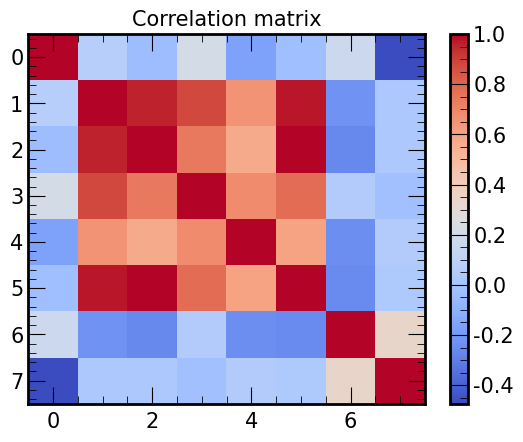

Feature  Correlation with Political Binary
0                       political_binary                           1.000000
1  Inflation, consumer prices (annual %)                           0.333160
2                          Net migration                           0.053432
3           GDP per capita (current US$)                           0.038160
4                      GDP (current US$)                           0.031174
5                      Population, total                           0.030020
6           Merchandise trade (% of GDP)                          -0.016457
7                           Unemployment                          -0.473636

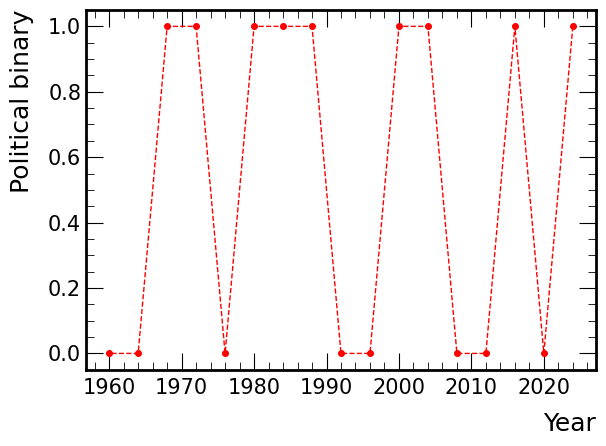

Year  Inflation, consumer prices (annual %)  Unemployment  \
0   2024                               4.116338      4.027273   
1   2020                               1.233584      8.091667   
2   2016                               1.261583      4.875000   
3   2012                               2.069337      8.075000   
4   2008                               3.839100      5.800000   
5   2004                               2.677237      5.541667   
6   2000                               3.376857      3.966667   
7   1996                               2.931204      5.408333   
8   1992                               3.028820      7.491667   
9   1988                               4.077741      5.491667   
10  1984                               4.300535      7.508333   
11  1980                              13.549202      7.175000   
12  1976                               5.744813      7.700000   
13  1972                               3.272278      5.600000   
14  1968                               4.271796      3.558333   
15  1964                               1.278912      5.158333   
16  1960                               1.457976      5.541667   

    political_binary  
0                  1  
1                  0  
2                  1  
3                  0  
4                  0  
5                  1  
6                  1  
7                  0  
8                  0  
9                  1  
10                 1  
11                 1  
12                 0  
13                 1  
14                 1  
15                 0  
16                 0

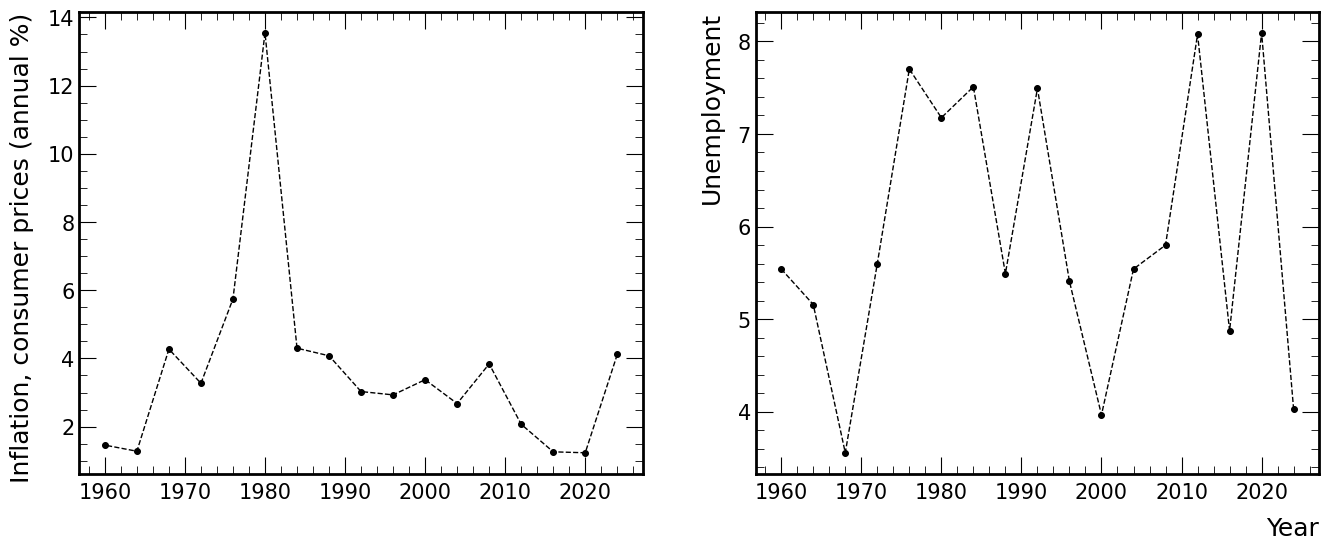

In [ ]:
def prepare_data(df_in): 

    # Extract correlations 

    # List of columns to exclude
    exclude_columns = ['Year', 'Winner', 'Party', 'EC', 'PV', 'Lean', 'Era']

    # Filter the dataframe to exclude specific columns
    df_corr = df_in.drop(columns=exclude_columns)

    # Calculate the correlation matrix
    corr_matrix = df_corr.corr()

    # Plot the heatmap using imshow
    plt.figure()
    plt.imshow(corr_matrix, cmap='coolwarm', aspect='auto')
    plt.colorbar()

    plt.title("Correlation matrix")
    plt.show()

    # Extract the correlation with 'political_binary'
    corr_with_target = corr_matrix['political_binary'].sort_values(ascending=False)
    # Convert the correlation series to a DataFrame
    corr_with_target = corr_with_target.to_frame().reset_index()
    # Set columns
    corr_with_target.columns = ['Feature', 'Correlation with Political Binary']
    # Drop NaN values
    corr_with_target = corr_with_target.dropna()

    # Display he correlations for the features with political_binary
    display(corr_with_target)

    # Get features with correlation over 30% 
    features = corr_with_target['Feature'][np.abs(corr_with_target['Correlation with Political Binary']) >= 0.30]
    # Drop political_binary from features
    features = features.drop(index=0)
    
    # Create model data
    df_model = df_in[['Year'] + list(features) + ['political_binary']].dropna()
    
    # Plot features over time
    pl = Plot()

    # Plot poltical binary
    pl.plot_graph(x=df_model['Year'], y=df_model['political_binary'],
                xlabel='Year', ylabel='Political binary',
                linestyle="--", col='red', save=False)

    # Plot features
    fig, ax1 = plt.subplots(1,2, figsize=(8*2, 6)) 

    # Fix non-numeric values
    for i_feature, feature in enumerate(features):

        df_model[feature] = pd.to_numeric(df_model[feature], errors='coerce')

        # row, col = divmod(i_feature, 2)  # Calculate the row and column index for ax1

        pl.plot_graph(x=df_model['Year'], y=list(df_model[feature]),
                xlabel='Year', ylabel=feature,
                linestyle="--", save=False, ax=ax1[i_feature]) # row, col])
        
        # Explicitly set the axes labels
        # ax1[row, col].set_xlabel('Year')
        # ax1[row, col].set_ylabel(feature)
        ax1[i_feature].set_ylabel(feature)

    return df_model, features

df_model, features = prepare_data(df_comb)

display(df_model)



## Baseline logitistic regression

In [125]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score 

def train_model(X, y, random_state=42):
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=random_state
    )
    
    # Scale the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Train the model
    model = LogisticRegression(random_state=random_state)
    model.fit(X_train_scaled, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test_scaled)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    # Get feature importance
    feature_importance = pd.DataFrame({
        'Feature': X.columns,
        'Importance': abs(model.coef_[0])
    }).sort_values('Importance', ascending=False)
    
    return model, accuracy, feature_importance, scaler

# for i in range(100):

X = df_model[features]
y = df_model['political_binary']

model, accuracy, importance, scaler = train_model(X, y, random_state=42)

# print(f'random_state {i},  accuracy {accuracy}')

print('Model:', model)
print('Accuracy:', accuracy)
print('Importance:\n', importance)
print('Scaler:\n', scaler)

Model: LogisticRegression(random_state=42)
Accuracy: 0.75
Importance:
                                  Feature  Importance
1                           Unemployment    0.867527
0  Inflation, consumer prices (annual %)    0.679403
Scaler:
 StandardScaler()


## Logisitic regression with leave-one-out cross validation (LOOCV)

In [126]:
from sklearn.model_selection import LeaveOneOut

def train_model(X, y, random_state=42):
    # Initialize the Leave-One-Out cross-validation
    loo = LeaveOneOut()
    
    accuracies = []
    feature_importances = []
    
    # Loop through each train-test split from LOO
    for train_index, test_index in loo.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        # Scale the features
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
        
        # Train the model
        model = LogisticRegression(random_state=random_state)
        model.fit(X_train_scaled, y_train)
        
        # Make predictions
        y_pred = model.predict(X_test_scaled)
        
        # Calculate accuracy
        accuracy = accuracy_score(y_test, y_pred)
        accuracies.append(accuracy)
        
        # Get feature importance for this iteration
        importance = pd.DataFrame({
            'Feature': X.columns,
            'Importance': abs(model.coef_[0])
        }).sort_values('Importance', ascending=False)
        
        feature_importances.append(importance)
    
    # Average the accuracy across all splits
    avg_accuracy = np.mean(accuracies)
    
    # Aggregate feature importances
    all_feature_importances = pd.concat(feature_importances).groupby('Feature').mean().sort_values('Importance', ascending=False)
    
    return model, avg_accuracy, all_feature_importances, scaler

# Define your features and target
X = df_model[features]
y = df_model['political_binary']

model, avg_accuracy, importance, scaler = train_model(X, y) 

print('Model:', model)
print('Average Accuracy:', avg_accuracy)
print('Feature Importance:\n', importance)


Model: LogisticRegression(random_state=42)
Average Accuracy: 0.5882352941176471
Feature Importance:
                                        Importance
Feature                                          
Unemployment                             0.976647
Inflation, consumer prices (annual %)    0.797309


## Random forest with LOOCV

In [127]:
from sklearn.ensemble import RandomForestClassifier

def train_model(X, y, random_state=42):
    loo = LeaveOneOut()
    accuracies = []
    feature_importances = []
    
    for train_index, test_index in loo.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        # Scale the features
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
        
        # Train the model
        model = RandomForestClassifier(random_state=random_state)
        model.fit(X_train_scaled, y_train)
        
        # Make predictions
        y_pred = model.predict(X_test_scaled)
        
        # Calculate accuracy
        accuracy = accuracy_score(y_test, y_pred)
        accuracies.append(accuracy)
        
        # Get feature importance for this iteration
        importance = pd.DataFrame({
            'Feature': X.columns,
            'Importance': model.feature_importances_
        }).sort_values('Importance', ascending=False)
        
        feature_importances.append(importance)
    
    avg_accuracy = np.mean(accuracies)
    all_feature_importances = pd.concat(feature_importances).groupby('Feature').mean().sort_values('Importance', ascending=False)
    
    return model, avg_accuracy, all_feature_importances, scaler

# Train and evaluate Random Forest model
model, avg_accuracy, importance, scaler = train_model(X, y)

print('Model:', model)
print('Average Accuracy:', avg_accuracy)
print('Feature Importance:\n', importance)


Model: RandomForestClassifier(random_state=42)
Average Accuracy: 0.5882352941176471
Feature Importance:
                                        Importance
Feature                                          
Unemployment                             0.501291
Inflation, consumer prices (annual %)    0.498709


## SVM with LOOCV

In [129]:
from sklearn.svm import SVC

def train_model(X, y, random_state=42):
    loo = LeaveOneOut()
    accuracies = []
    feature_importances = []
    
    for train_index, test_index in loo.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        # Scale the features
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
        
        # Train the model (using SVM)
        # model = SVC(random_state=random_state)
        # model.fit(X_train_scaled, y_train)

        # Train the model (using linear SVM)
        model = SVC(kernel='linear', random_state=random_state)
        model.fit(X_train_scaled, y_train)

        
        # Make predictions
        y_pred = model.predict(X_test_scaled)
        
        # Calculate accuracy
        accuracy = accuracy_score(y_test, y_pred)
        accuracies.append(accuracy)
        
        # SVM doesn't have feature importances directly, so we'll use coefficients
        importance = pd.DataFrame({
            'Feature': X.columns,
            'Importance': np.abs(model.coef_[0])  # Taking absolute values of the coefficients
        }).sort_values('Importance', ascending=False)
        
        feature_importances.append(importance)
    
    avg_accuracy = np.mean(accuracies)
    all_feature_importances = pd.concat(feature_importances).groupby('Feature').mean().sort_values('Importance', ascending=False)
    
    return model, avg_accuracy, all_feature_importances, scaler

# Assuming X and y are already defined
model, avg_accuracy, importance, scaler = train_model(X, y)

print('Model:', model)
print('Average Accuracy:', avg_accuracy)
print('Feature Importance:\n', importance)


Model: SVC(kernel='linear', random_state=42)
Average Accuracy: 0.47058823529411764
Feature Importance:
                                        Importance
Feature                                          
Unemployment                             0.922941
Inflation, consumer prices (annual %)    0.555398
